# Exploring SOUTHWEST Flights 
## by Mzoon Alwalmani

## Investigation Overview

In this investigation, I wanted to look at the variables like for e.g. what type of delay takes more time. Also,the relationship between the variables like Departure Delay and Arrival Delay, and what day has more flights through the months, do the distance has an effect on the dalay.

## Dataset Overview

The dataset contains detailed information about the US flights in 2008 it has 6,737,141 flights with 29 features. after that the data has been cleaned and since I interested in SOUTHWEST just a subset from the dataset was used. now it contains 1,199,269 flights with 21 features. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
clean_SouthWest = pd.read_csv('SOUTHWEST.csv')
# convert to date
clean_SouthWest['Date']= pd.to_datetime(clean_SouthWest['Date'], format= '%Y-%m-%d',errors='coerce')
# add the difference time between Actual and CRS Elapsed Time
clean_SouthWest['diff']= clean_SouthWest['ActualElapsedTime'] - clean_SouthWest['CRSElapsedTime']
# take sample of the data
sample=clean_SouthWest.sample(n=100000)

## Departure Delay And Arrival Delay

The Departure Delay has a peak around 0 (no delay) with a lot of values fall between -10 (no delay) to 20. normaly, the actual departure time could advance scheduled departure time by few minutes.

On other hand, the Arrival Delay has a peak around -10 (no delay) with a lot of values fall between -40 (no delay) to 40. normaly, the actual arrival time could advance scheduled time this is due the few buffer minutes in the scheduled time.

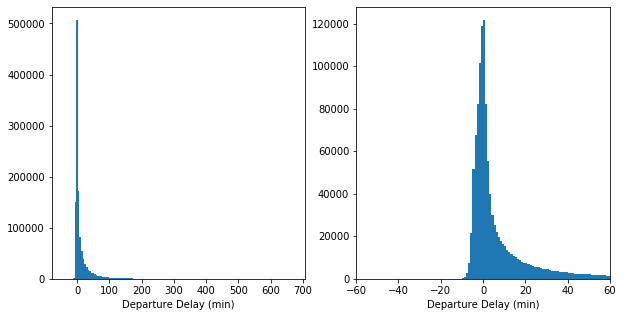

In [5]:
plt.figure(figsize = [10, 5])

plt.subplot(1, 2, 1)
binsize = 5
bins = np.arange(clean_SouthWest['DepDelay'].min()-binsize, clean_SouthWest['DepDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'DepDelay', bins = bins)
plt.xlabel('Departure Delay (min)');


plt.subplot(1, 2, 2)
binsize = 1
bins = np.arange(clean_SouthWest['DepDelay'].min()-binsize, clean_SouthWest['DepDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'DepDelay', bins = bins)
plt.xlabel('Departure Delay (min)')
plt.xlim(-60, 60);

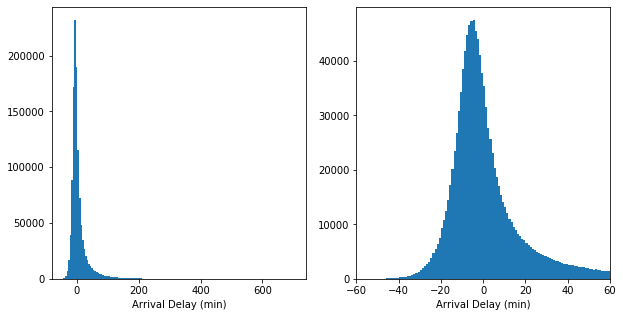

In [4]:
plt.figure(figsize=[10, 5])

plt.subplot(1, 2, 1)
binsize = 5
bins = np.arange(clean_SouthWest['DepDelay'].min()-binsize, clean_SouthWest['ArrDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'ArrDelay', bins = bins)
plt.xlabel('Arrival Delay (min)');

plt.subplot(1, 2, 2)
binsize = 1
bins = np.arange(clean_SouthWest['ArrDelay'].min()-binsize, clean_SouthWest['ArrDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'ArrDelay', bins = bins)
plt.xlabel('Arrival Delay (min)')
plt.xlim(-60, 60);

## Delays Distributions

After ploting the distributions of the five delay types. It is clear that the Weather Delay could take more time compared to other types.

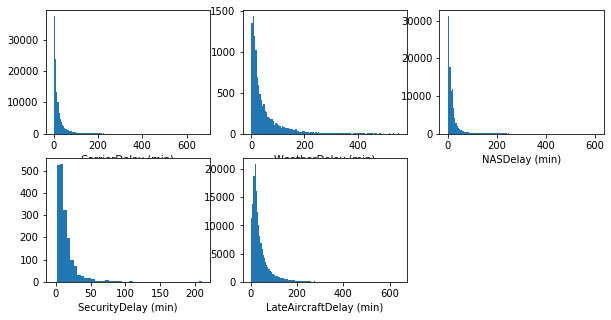

In [6]:
plt.figure(figsize = [10, 5])

plt.subplot(2, 3, 1)
binsize = 5
bins = np.arange(clean_SouthWest['CarrierDelay'].min()-binsize, clean_SouthWest['CarrierDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'CarrierDelay', bins = bins)
plt.xlabel('CarrierDelay (min)');


plt.subplot(2, 3, 2)
binsize = 5
bins = np.arange(clean_SouthWest['WeatherDelay'].min()-binsize, clean_SouthWest['WeatherDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'WeatherDelay', bins = bins)
plt.xlabel('WeatherDelay (min)');


plt.subplot(2, 3, 3)
binsize = 5
bins = np.arange(clean_SouthWest['NASDelay'].min()-binsize, clean_SouthWest['NASDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'NASDelay', bins = bins)
plt.xlabel('NASDelay (min)');


plt.subplot(2, 3, 4)
binsize = 5
bins = np.arange(clean_SouthWest['SecurityDelay'].min()-binsize, clean_SouthWest['SecurityDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'SecurityDelay', bins = bins)
plt.xlabel('SecurityDelay (min)');


plt.subplot(2, 3, 5)
binsize = 5
bins = np.arange(clean_SouthWest['LateAircraftDelay'].min()-binsize, clean_SouthWest['LateAircraftDelay'].max()+binsize, binsize)
plt.hist(data = clean_SouthWest, x = 'LateAircraftDelay', bins = bins)
plt.xlabel('LateAircraftDelay (min)');

## Relationship Between The Arrival And Departuer Delay

There is a nearly liner relationship between the Arrival and Departuer delay. Interestingly, when the Departuer time delayed for few minutes it will sometimes result in Arrival delay more than the Departuer. this could happen when the Distance to the distnation is small. so, the gates are reserved and the airport did not allocate new gate yet.

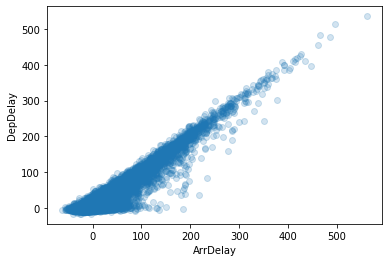

In [7]:
sb.regplot(data = sample, x = 'ArrDelay', y = 'DepDelay', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5});

## Relationship Between The Distance And Diffirence Between The ActualAnd CRS Elapsed Time

When the distance is small (that means the flight time is small) there are number of blue points which means the diffirence between the Actual and CRS Elapsed Time is big this could be due delay in Departuer.

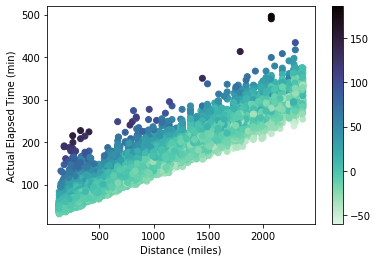

In [8]:
plt.scatter(data = sample, x = 'Distance', y = 'ActualElapsedTime', c = 'diff',
            cmap = 'mako_r');
plt.xlabel('Distance (miles)');
plt.ylabel('Actual Elapsed Time (min)');
plt.colorbar();

## Relationship Between The Origin And Distnation

here is a heat map that count the flights number from the top 5 origin (in terms of flights number) to other destnations.

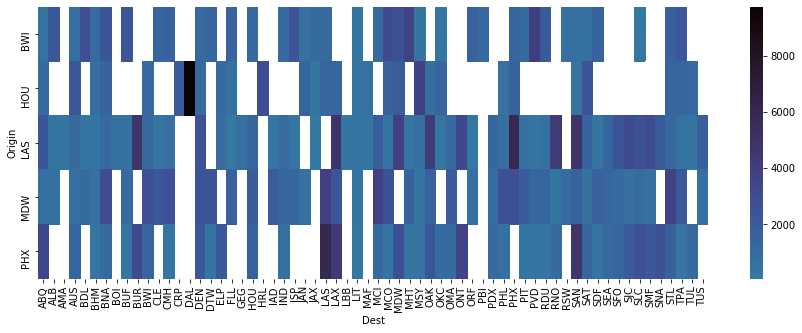

In [9]:
df_count=clean_SouthWest[(clean_SouthWest['Origin']== 'LAS') | 
                         (clean_SouthWest['Origin']== 'MDW') |
                         (clean_SouthWest['Origin']== 'PHX') |
                         (clean_SouthWest['Origin']== 'BWI') |
                         (clean_SouthWest['Origin']== 'HOU')]
df_count=df_count.groupby(["Origin", "Dest"]).size().reset_index(name='count')
df_count = df_count.pivot(index = 'Origin', columns = 'Dest', values = 'count')
plt.figure(figsize = [15, 5])
sb.heatmap(df_count,cmap = 'mako_r',center = 0);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!